In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import task_complexity
import matplotlib.pyplot as plt
import numpy as np

In [2]:
noise_level = 0.0
spread_value = 10.0
x_vals = torch.Tensor(np.sort(spread_value*torch.randn(1000)))
y_vals = torch.sin(x_vals) + noise_level*torch.randn(1000)

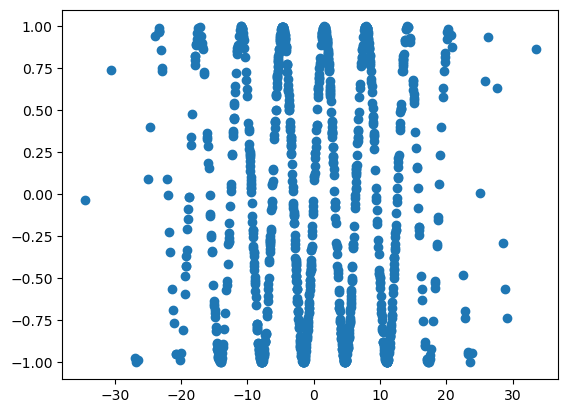

In [3]:
plt.scatter(x_vals, y_vals)

In [4]:
trainloader = torch.utils.data.DataLoader(list(zip(x_vals, y_vals)), batch_size = 1)

In [5]:
class Net_Sin_Data_No_Periodic(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 1)
        self.relu = nn.ReLU(inplace = True)
        self.fc2 = nn.Linear(1, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
    
class Net_Sin_Data_Periodic(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 1)
        self.fc2 = nn.Linear(1, 1)

    def forward(self, x):
        x = self.fc1(x)
        # Include a periodic Activation function
        x = torch.cos(x)
        x = self.fc2(x)
        return x

In [6]:
criterion = nn.MSELoss()

In [7]:
mi_score_no_periodic = task_complexity.compute_complexity(Net_Sin_Data_No_Periodic, 10, trainloader, criterion, n_bins = 100)
print(f"Score Without Periodic Activation: {mi_score_no_periodic}")

Score Without Periodic Activation: 0.13226983926097824


In [8]:
mi_score_periodic = task_complexity.compute_complexity(Net_Sin_Data_Periodic, 10, trainloader, criterion, n_bins = 100)
print(f"Score With Periodic Activation: {mi_score_periodic}")

Score With Periodic Activation: 0.1695968090674751


In [9]:
nonperiodic_examples = []
periodic_examples = []
for trial in range(500):
    if trial % 100 == 0:
        print(f"Trial: {trial}")
    x_vals = torch.Tensor(np.sort(spread_value*torch.randn(1000)))
    y_vals = torch.sin(x_vals) + noise_level*torch.randn(1000)
    trainloader = torch.utils.data.DataLoader(list(zip(x_vals, y_vals)), batch_size = 1)

    mi_score_no_periodic = task_complexity.compute_complexity(Net_Sin_Data_No_Periodic, 10, trainloader, criterion, n_bins = 100)
    nonperiodic_examples.append(mi_score_no_periodic)
    mi_score_periodic = task_complexity.compute_complexity(Net_Sin_Data_Periodic, 10, trainloader, criterion, n_bins = 100)
    periodic_examples.append(mi_score_periodic)

Trial: 0
Trial: 100
Trial: 200
Trial: 300
Trial: 400


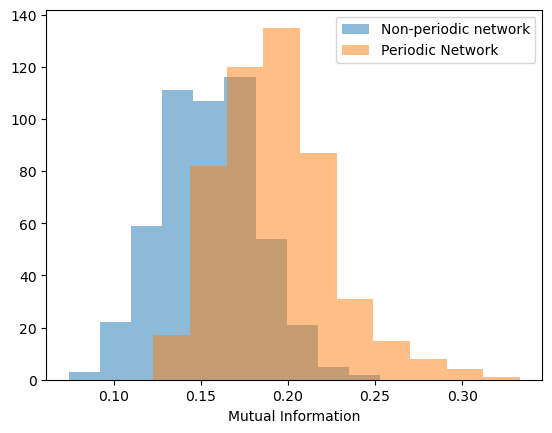

In [13]:
plt.hist(nonperiodic_examples, alpha = 0.5, label = "Non-periodic network")
plt.hist(periodic_examples, alpha = 0.5, label = "Periodic Network")
plt.xlabel("Mutual Information")
plt.legend(loc = "upper right")

Text(0, 0.5, 'Periodic MI Value')

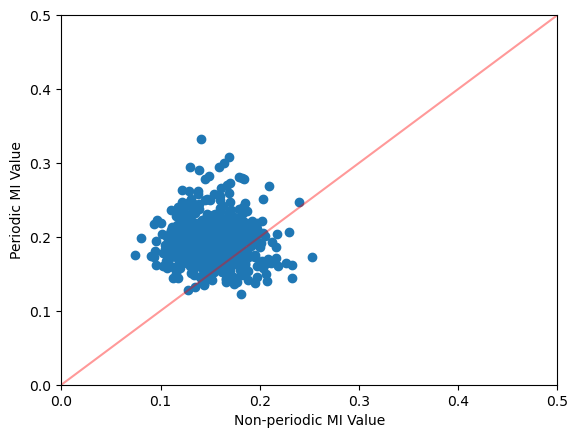

In [15]:
plt.scatter(nonperiodic_examples, periodic_examples)
vals = np.linspace(0.00, 0.5, 100)
plt.plot(vals, vals, color = "red", alpha = 0.4)
plt.xlim(0.00, 0.5)
plt.ylim(0.00, 0.5)
plt.xlabel("Non-periodic MI Value")
plt.ylabel("Periodic MI Value")